# Principal Component Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the Data

In [2]:
df = pd.read_csv("iris_dataset.csv")

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df['target'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: target, dtype: int64

In [4]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

In [ ]:
features

In [5]:
# Separating out the features
X = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [6]:
# Standardizing the features
X = StandardScaler().fit_transform(X)

# PCA For 2 Components

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca_2 = PCA(n_components=2)

In [11]:
principalComponents = pca_2.fit_transform(X)

In [12]:
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

In [13]:
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [14]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [15]:
finalDf.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa


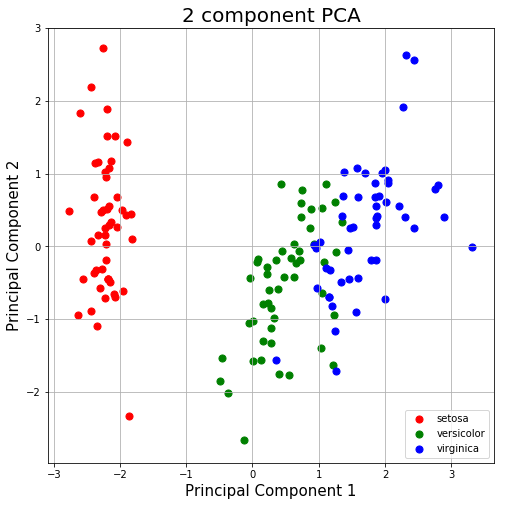

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# PCA For 3 Components

In [17]:
from sklearn.decomposition import PCA
pca_3 = PCA(n_components=3)
principalComponents = pca_3.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [18]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

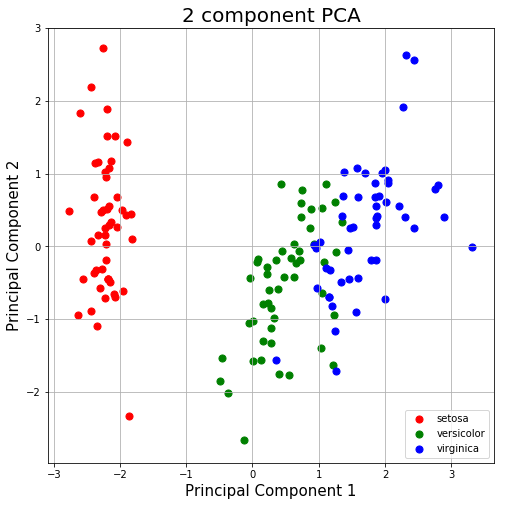

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

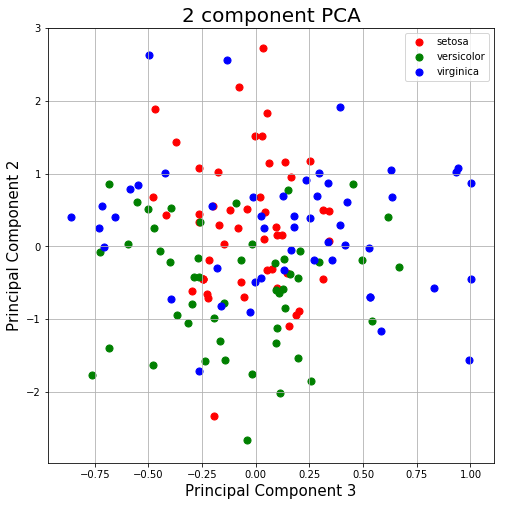

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 3']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

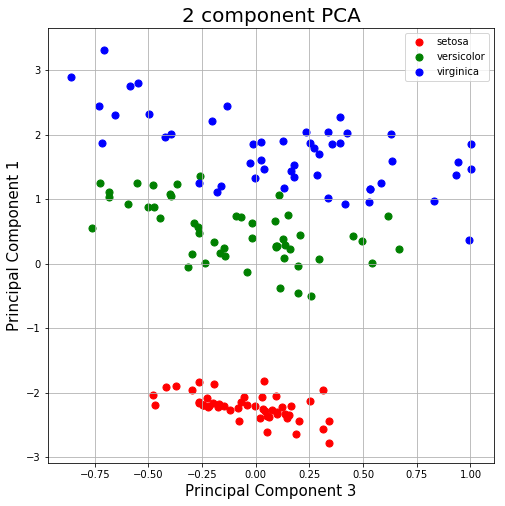

In [35]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 15)
ax.set_ylabel('Principal Component 1', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 3']
               , finalDf.loc[indicesToKeep, 'principal component 1']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Explained Variance Ratio

In [22]:
#the variance of the dataset from each axis is obtained using explained_variance_ratio_

In [23]:
pca_2.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [24]:
pca_3.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832])

# Choosing the Principal Components

When we donot exactly know the no.of components to be considered, we can specify the float value between 0.0 to 1.0 indicating the ratio of variance we wish to preserve

In [25]:
#when the components variance is 0.95

In [26]:
pca = PCA(n_components=0.95)

In [27]:
principalComponents = pca.fit_transform(X)

In [28]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [29]:
#when the components variance is 0.70

In [30]:
pca = PCA(n_components=0.70)

In [31]:
principalComponents = pca.fit_transform(X)

In [32]:
pca.explained_variance_ratio_

array([0.72770452])